In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy
from sympy import  cos, sin, tan
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

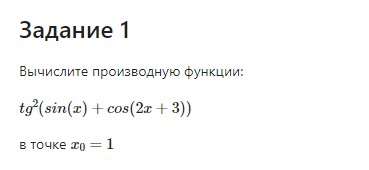

In [ ]:
x = sym.Symbol('x')

In [ ]:
tan(sin(x)+cos(2*x+3))**2

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
sym.diff(tan(sin(x)+cos(2*x+3))**2).evalf(subs={'x':1})

55.3859176353379

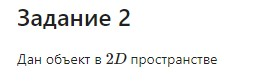
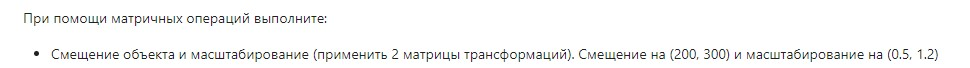

(-200.0, 200.0)

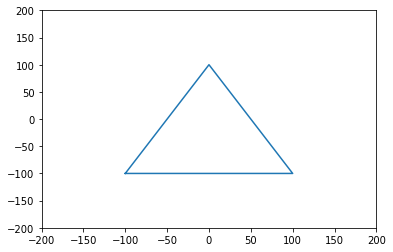

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

In [ ]:
a=np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])

In [ ]:
tt = []
for kk in A:
  tt.append(a@kk)

(-200.0, 200.0)

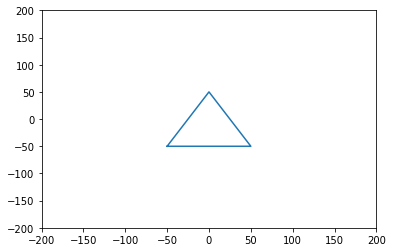

In [ ]:
A = np.array(tt)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

In [ ]:
a=np.array([[1,0,0],[1,1,1],[0,0,1]])

In [ ]:
tt = []
for kk in A:
  tt.append(a@kk)

(-200.0, 200.0)

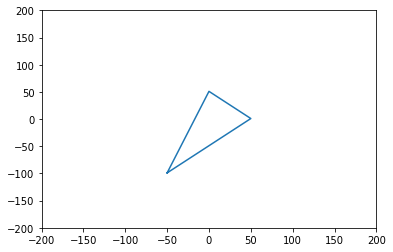

In [ ]:
A = np.array(tt)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

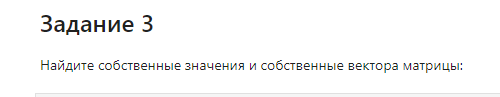

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
np.linalg.eigvals(m)

array([ 3., -1.])

In [ ]:
np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

In [ ]:
res = np.linalg.eig(m)

In [ ]:
res2 = res[1]

In [ ]:
res3=np.transpose(res2)

In [ ]:
res3[0]

array([0.89442719, 0.4472136 ])

In [ ]:
res3[1]

array([-0.89442719,  0.4472136 ])

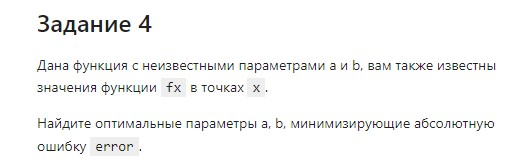

In [2]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [3]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [4]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

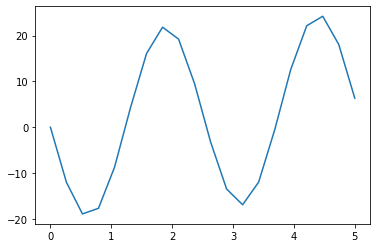

In [5]:
plt.plot(x, fx)
plt.show()

In [6]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [7]:
res = curve_fit(f, x, fx, p0=[0,1], method='lm')

In [8]:
res2=[]
print(res[1][0])
res2.append(res[0])
res2.append(res[1][0])
print(res2)

[ 2.68953112e-18 -5.23196246e-20]
[array([ 3. , -2.5]), array([ 2.68953112e-18, -5.23196246e-20])]


In [9]:
print(res)

(array([ 3. , -2.5]), array([[ 2.68953112e-18, -5.23196246e-20],
       [-5.23196246e-20,  2.80481711e-19]]))


In [10]:
res1=minimize(error, [0,0], method='COBYLA')

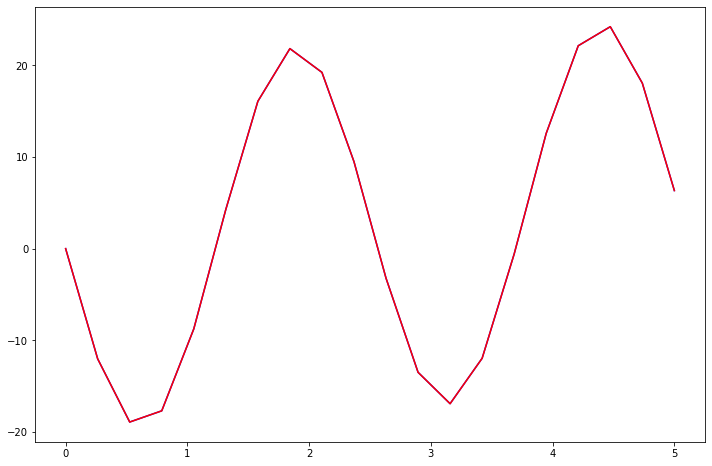

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.show()

**Задание 5**

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

for i in range(len(raitings)):
  minel=1000000
  for j in  range(len(raitings)):
    res= np.rad2deg(np.arccos(np.dot( raitings[i],raitings[j])/(np.linalg.norm( raitings[i])*np.linalg.norm(raitings[j]))))
    if i!=j and minel>res:
      minel=res
      resi = i
      resj =j
  print(raitings[resi], raitings[resj ] )

 


[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
print(raitings[0])
l=len(raitings)
print(l)

[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
10


In [ ]:
film_1=np.array([ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6])
film_3=np.array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2])
np.rad2deg(np.arccos(np.dot(film_1,film_3)/(np.linalg.norm(film_1)*np.linalg.norm(film_3))))

43.334615633565974